# Simulate Brownian motion on [0, 1], and a Brownian bridge on [0, 1], and plot them.

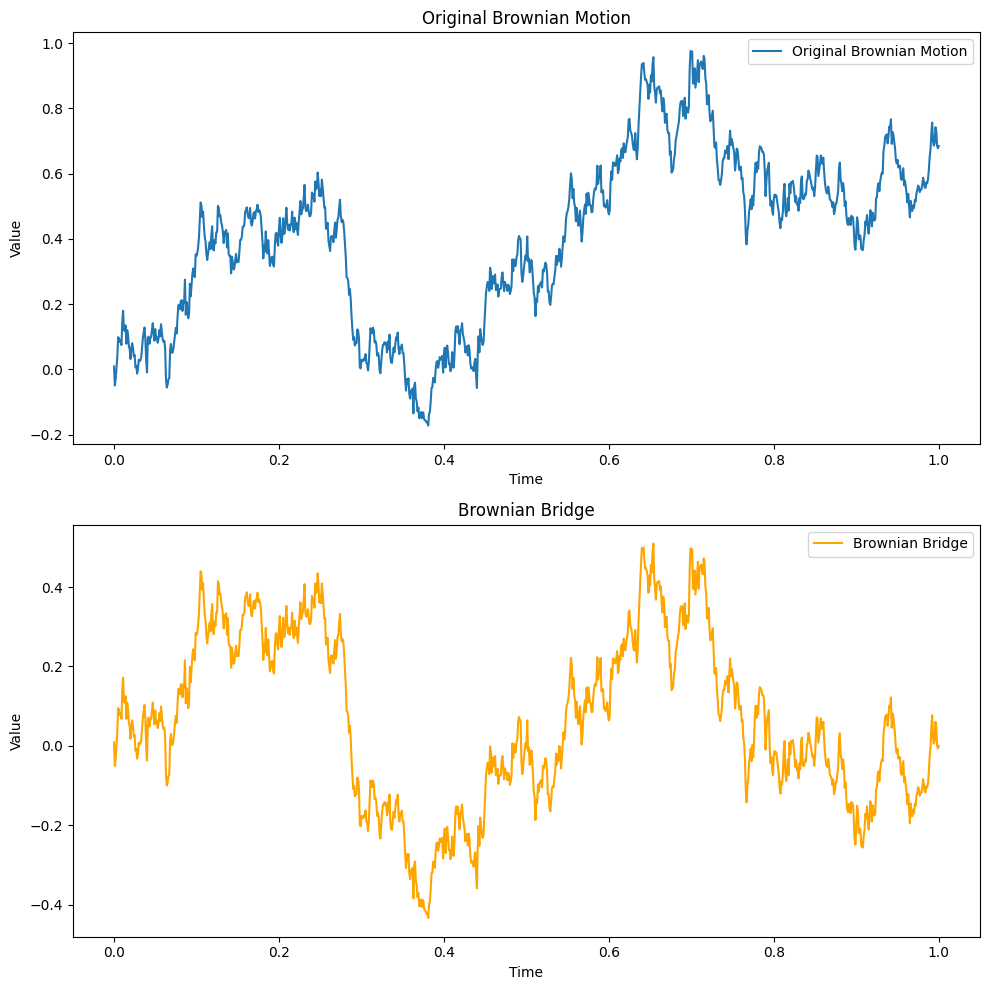

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Set the number of points
n = 1001
times = np.linspace(0, 1, num=n)

# Set the seed for reproducibility
np.random.seed(17)

# Generate Brownian motion
dW = np.random.normal(size=n) / np.sqrt(n)
W = np.cumsum(dW)

# Plot the original Brownian motion
plt.figure(figsize=(10, 10))

# Subplot 1: Original Brownian Motion
plt.subplot(2, 1, 1)
plt.plot(times, W, label='Original Brownian Motion')
plt.title('Original Brownian Motion')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Subplot 2: Brownian Bridge
plt.subplot(2, 1, 2)
B = W - times * W[-1]
plt.plot(times, B, label='Brownian Bridge', color='orange')
plt.title('Brownian Bridge')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


# Simulate the 95th percentile of the supremum of the absolute Brownian bridge

In [52]:
import numpy as np

# Set simulation parameters
num_steps = 1000
time_interval = 1
time_step = time_interval / num_steps
num_simulations = 10000

# Initialize an array to store the supremum of each simulation
max_values = np.zeros(num_simulations)

# Simulate Brownian bridges and find their supremums
for i in range(num_simulations):
    random_walk = np.random.standard_normal(size=num_steps)
    brownian_motion = np.cumsum(random_walk) * np.sqrt(time_step)
    time_points = np.linspace(0, time_interval, num_steps)
    brownian_bridge = brownian_motion - time_points * brownian_motion[-1]
    max_values[i] = np.max(brownian_bridge)

# Calculate the 95th percentile of the supremums
q_95th_percentile = np.percentile(max_values, 95)

# Print the result
print(f"The 95th percentile of the supremum of the Brownian bridge is {q_95th_percentile:.4f}.")


The 95th percentile of the supremum of the Brownian bridge is 1.2254.


# calculate the proportion of times out of (say) 1000 repetitions that T exceeds the threshold q computed in part (ii).

In [53]:
import numpy as np
from scipy.stats import ks_2samp

def ks_test_simulation(n, distribution='uniform', num_repetitions=1000, threshold_q=None):
    ks_test_failures = 0

    for _ in range(num_repetitions):
        # Generate random samples from the chosen distribution
        if distribution == 'uniform':
            samples = np.random.uniform(size=n)
        elif distribution == 'normal':
            samples = np.random.normal(size=n)
        else:
            # Add more distributions as needed
            raise ValueError("Unsupported distribution")

        # Calculate the empirical distribution function (Fn)
        ecdf = np.arange(1, n + 1) / n

        # Calculate the KS test statistic
        ks_statistic = np.sqrt(n) * np.max(np.abs(ecdf - np.sort(samples)))

        # Check if the KS test statistic exceeds the threshold
        if threshold_q is not None and ks_statistic > threshold_q:
            ks_test_failures += 1

    proportion_failures = ks_test_failures / num_repetitions
    return proportion_failures

# Set the sample size and distribution (e.g., 'uniform', 'normal')
n_samples = 100
chosen_distribution = 'uniform'

# Assuming threshold_q is computed previously (from part ii)
threshold_q = 1.2208 # Provide the computed threshold_q value here

# Perform KS test simulation and print the proportion of times T exceeds the threshold
proportion_failures = ks_test_simulation(n_samples, chosen_distribution, threshold_q=threshold_q)
print(f'Proportion of Failures in KS Test: {proportion_failures:.4f}')


Proportion of Failures in KS Test: 0.0780
